# Importing libraries

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Loading our data 

we have three that data det what we will do is to first ty to load the data, then do some visualisation , Data Cleaning and  Model selection  and last prediction


In [91]:
 #test data
missing_values=[-1]
data =pd.read_csv('/home/joelnteupe/final cv/Morgage/MortGage_Applications/train_values.csv',na_values=missing_values)
data_labels=pd.read_csv('/home/joelnteupe/final cv/Morgage/MortGage_Applications/train_labels.csv',na_values=missing_values)
test=pd.read_csv('/home/joelnteupe/final cv/Morgage/MortGage_Applications/test_values.csv',na_values=missing_values)                                                                           
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 22 columns):
row_id                            500000 non-null int64
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            423018 non-null float64
state_code                        480868 non-null float64
county_code                       479534 non-null float64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  460052 non-null float64
population                        477535 non-null float64
minority_population_pct           477

From the given data the columns where already coded so we dont have to code it again

# Data Visualisation

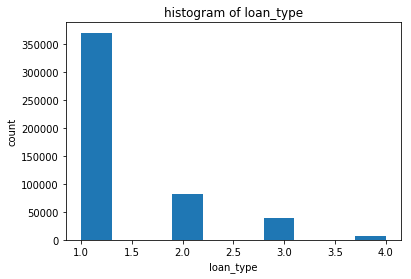

In [92]:
def drawhist(data,feature):
    plt.hist(data[feature])

drawhist(data,'loan_type')
plt.ylabel("count")
plt.xlabel("loan_type")
plt.title("histogram of loan_type")
plt.show()





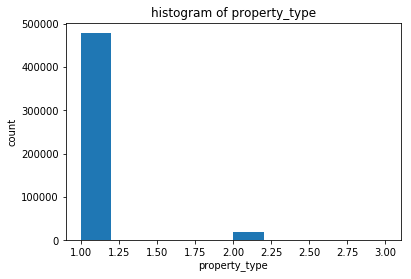

In [93]:
drawhist(data,'property_type')
plt.ylabel("count")
plt.xlabel("property_type")
plt.title("histogram of property_type")
plt.show()


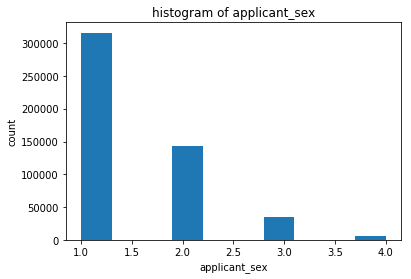

In [94]:
drawhist(data,'applicant_sex')
plt.ylabel("count")
plt.xlabel("applicant_sex")
plt.title("histogram of applicant_sex")
plt.show()

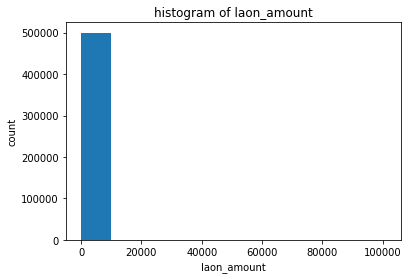

In [95]:
drawhist(data,'loan_amount')
plt.ylabel("count")
plt.xlabel("laon_amount")
plt.title("histogram of laon_amount")
plt.show()


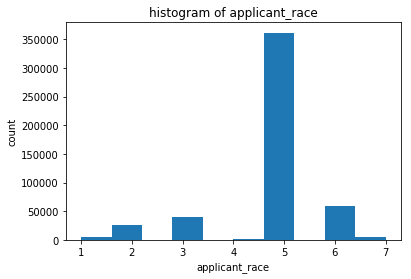

In [96]:
drawhist(data,'applicant_race')
plt.ylabel("count")
plt.xlabel("applicant_race")
plt.title("histogram of applicant_race")
plt.show()

/home/joelnteupe/.local/lib/python3.5/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/joelnteupe/.local/lib/python3.5/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


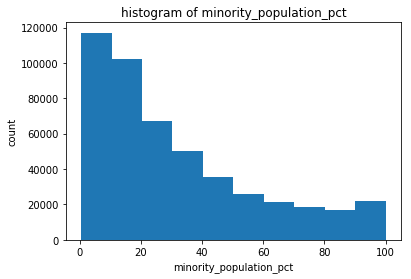

In [97]:
drawhist(data,'minority_population_pct')
plt.ylabel("count")
plt.xlabel("minority_population_pct")
plt.title("histogram of minority_population_pct")
plt.show()

/home/joelnteupe/.local/lib/python3.5/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/joelnteupe/.local/lib/python3.5/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


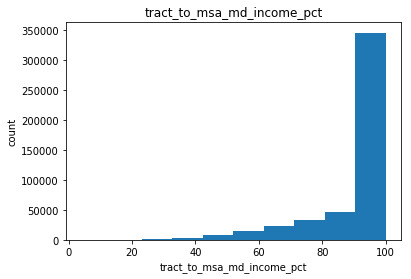

In [98]:
drawhist(data,'tract_to_msa_md_income_pct')
plt.ylabel("count")
plt.xlabel("tract_to_msa_md_income_pct")
plt.title("tract_to_msa_md_income_pct")
plt.show()


Now let us evaluate the number of N/a in the train data and also merge the train data and train labels

In [99]:
dat=data.merge(data_labels, how='left', on='row_id')
missing_data = (data.isnull().sum())
missing_tes = (test.isnull().sum())
missing_data
#dat.head()

row_id                                0
loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                            76982
state_code                        19132
county_code                       20466
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  39948
population                        22465
minority_population_pct           22466
ffiecmedian_family_income         22440
tract_to_msa_md_income_pct        22514
number_of_owner-occupied_units    22565
number_of_1_to_4_family_units     22530
lender                                0
co_applicant                          0
dtype: int64

In [100]:

#data['msa_md'].value_counts()

We will apply the method where we remove those that removes rws with the hihest numbers of missing values

# Data Cleaning

In [101]:
cols = ['loan_amount','lender','loan_type','loan_purpose','preapproval','applicant_income','applicant_ethnicity','applicant_race','applicant_sex','accepted']

col1 = ['row_id','loan_amount','lender','loan_type','loan_purpose','preapproval','applicant_income','applicant_ethnicity','applicant_race','applicant_sex']



In [102]:
dat=dat[cols]
test=test[col1]
dat.dropna(axis=0, how = 'any', inplace=True)
test.dropna(axis=0, how = 'any', inplace=True)
row=test['row_id']

In [103]:
dat.head()

,loan_amount,lender,loan_type,loan_purpose,preapproval,applicant_income,applicant_ethnicity,applicant_race,applicant_sex,accepted
0,70.0,4536,3,1,3,24.0,2,5,1,1
1,178.0,2458,1,3,3,57.0,1,5,1,0
2,163.0,5710,2,3,3,67.0,2,5,1,1
3,155.0,5888,1,1,1,105.0,2,5,1,1
4,305.0,289,1,1,3,71.0,2,3,2,1


In [104]:
missing_dat = (dat.isnull().sum())
missing_dat 

loan_amount            0
lender                 0
loan_type              0
loan_purpose           0
preapproval            0
applicant_income       0
applicant_ethnicity    0
applicant_race         0
applicant_sex          0
accepted               0
dtype: int64

We will to train and the test the models we know so far and compare them and take the model with he highest accuracy

# Model Selection

# Random forest

Random forests is a supervised learning algorithm. It can be used both for classification and regression. It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.

In [105]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.io import arff
import pandas as pd



label_data=dat['accepted']
train_data=dat.iloc[ : , 0 : 9 ]
test_data=test.iloc[ : , 1 : 10 ]
X_train, X_test, y_train, y_test = train_test_split(train_data, label_data, test_size=0.7)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

train_data.head()

(138015, 9) (138015,)
(322037, 9) (322037,)


,loan_amount,lender,loan_type,loan_purpose,preapproval,applicant_income,applicant_ethnicity,applicant_race,applicant_sex
0,70.0,4536,3,1,3,24.0,2,5,1
1,178.0,2458,1,3,3,57.0,1,5,1
2,163.0,5710,2,3,3,67.0,2,5,1
3,155.0,5888,1,1,1,105.0,2,5,1
4,305.0,289,1,1,3,71.0,2,3,2


In [106]:
clf = RandomForestClassifier(n_jobs=4, random_state=50)
clf.fit(X_train, y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=2, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

/home/joelnteupe/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [107]:
preds = clf.predict(X_test)

In [108]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
clf.score(X_test,y_test)

0.6389700562357742

In [112]:
clf.score(X_train,y_train)

0.9801398398724777

In [110]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, preds))

Accuracy: 0.6389700562357742


Now we will use the andom forest regressor

In [32]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=10)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test) 
regressor.score(X_test,y_test)

0.10072097590328155

# KNN

Let us us KNN now

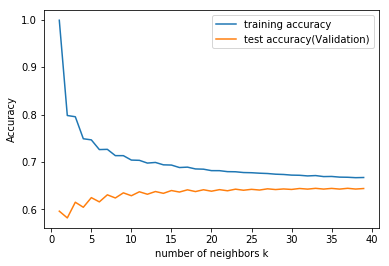

In [34]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_list = range(1, 40)

for k in neighbors_list:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=k)
    # fitting the model with the data
    knn.fit(X_train, y_train)
    # record training accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_list,
         training_accuracy, label="training accuracy")
plt.plot(neighbors_list,
        test_accuracy, label="test accuracy(Validation)")
plt.ylabel("Accuracy")
plt.xlabel("number of neighbors k")
plt.legend()
plt.show()

In [35]:
max(test_accuracy)

0.6444601086210591

In [111]:
max(training accuracy)

SyntaxError: invalid syntax (<ipython-input-111-c5fc40b6a65c>, line 1)

# Naive baise

In [61]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [62]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.999
Accuracy on test set: 0.603


Fom this let us appy random forest on our test data for prediction

# Using the Random forest for our prediction

In [113]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.io import arff
import pandas as pd

clf = RandomForestClassifier(n_jobs=2, random_state=0)

clf.fit(train_data, label_data)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

/home/joelnteupe/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [114]:
preds = clf.predict(test_data)

In [115]:
clf.score(train_data, label_data)

0.9781003017050246

In [67]:
d = {"row_id":row ,  "acceptance":preds}
M = pd.DataFrame(d)
M.head()


,acceptance,row_id
1,1,1
2,0,2
3,1,3
4,0,4
5,1,5


In [68]:
M.to_csv('prectRF.csv')

We have that the training accuracy for the Random forest is 97.81 % and training accuracy for the  Decision tree is 99.7% 

In [116]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(train_data, label_data)
print("Accuracy on training set: {:.3f}".format(tree.score(train_data, label_data)))

Accuracy on training set: 0.997


In [117]:
pred= tree.predict(test_data)


array([0, 0, 1, ..., 1, 1, 0])

In [119]:
d = {"row_id":row ,  "acceptance":preds}
D= pd.DataFrame(d)
D.head()

,acceptance,row_id
1,1,1
2,0,2
3,1,3
4,0,4
5,1,5


In [ ]:
D.to_csv('Good prect.csv')